# Distinguishing Sentiments

## News Mood

We will perform a sentiment analysis of five news sources through their twitter feeds. The overall sentiment (positive - neutral - negative) of the last 100 tweets will be visualized on a bar chart. A Scatter plot will be used to demonstrate the comprehensive data points of the last 100 tweets.

    1. Collecting tweet data during the evening news hour (approximately 5:30 pm CDT) seems to yield a more positive sentiment analysis.
    2. CBS as the only major network represented with a evening news broadcast seems to be the recipient of the positive sentiment with a counpund score of .37.
    3. CNN has a neutral score. The scatter plot shows a fairly even distribution of sentiment. This could be an example of neutral reporting.

In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import json
import seaborn as sns

import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
file_name = "C:\KUBootCamp\\api_keys.json"
data = json.load(open(file_name))
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']
gkey = data['openweathermap_api_key']


In [3]:
#Set up tweepy authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_terms = ( "@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes" )
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

sentiment_array = []
oldest_tweet = ""
# Create a dictionary to hold info pulled from API 
tweet_info = {"tweet source" : [],
              "tweet text" : [],
              "tweet date" : [],
              "media source" : [],
              "compound score" : [],
              "tweet positive score" : [],
              "tweet negative score" : [],
              "tweet neutral score" : []
             }

In [5]:
for x in range(5):
    for target in target_terms:
        # Variables for holding sentiments
        #text = ''
        #for x in range(1):
        #time.sleep(1)
        #i = 1
        public_tweets = api.user_timeline(target, page = x)
        #print(target)
        for tweet in public_tweets:
            #print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',',': ')))
            #text = ' '
            #text = tweet['target']
            #print(tweet)
            tweet_info["tweet source"].append(tweet["source"])
            tweet_info["tweet text"].append(tweet["text"])
            tweet_info["tweet date"].append(tweet["created_at"])
            tweet_info["media source"].append(target)

            tweet_info["compound score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_info["tweet positive score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_info["tweet neutral score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_info["tweet negative score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            #oldest_tweet = tweet["id_str"]
            
    # Store the Average Sentiments
    #sentiment = {"User": target,
                 #"Compound": np.mean(compound_list),
                 #"Positive": np.mean(positive_list),
                 #"Neutral": np.mean(negative_list),
                 #"Negative": np.mean(neutral_list),
                 #"Tweet Count": len(compound_list)}
    #airplane_text_list.append(text)
    # Print the Sentiments
    #print(sentiment)
    #print("")


In [6]:
# Convert dictionary to a DataFrame
df = pd.DataFrame.from_dict(tweet_info)
df.head()

,compound score,media source,tweet date,tweet negative score,tweet neutral score,tweet positive score,tweet source,tweet text
0,-0.4927,@BBC,Tue Apr 10 18:42:00 +0000 2018,0.158,0.842,0.0,"<a href=""https://studio.twitter.com"" rel=""nofo...",It wasn't until Henry VIII's reign that the #T...
1,-0.5106,@BBC,Tue Apr 10 18:00:27 +0000 2018,0.216,0.784,0.0,"<a href=""http://www.socialflow.com"" rel=""nofol...",Meet Rebekah - a former professional footballe...
2,0.0000,@BBC,Tue Apr 10 16:58:05 +0000 2018,0.000,1.000,0.0,"<a href=""http://www.socialflow.com"" rel=""nofol...",🌶🤯 A man who ate the world's hottest chilli pe...
3,0.0000,@BBC,Tue Apr 10 16:34:54 +0000 2018,0.000,1.000,0.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @bbccomedy: Henry of Eight, the Tudor Kim K..."
4,0.0000,@BBC,Tue Apr 10 16:32:08 +0000 2018,0.000,1.000,0.0,"<a href=""http://www.socialflow.com"" rel=""nofol...",👭 Ten celebrity pairs who look so freakily ali...


In [7]:
# Create a scatter plot based on vader's compound score for all tweets
from dateutil import parser
most_recent_tweet = parser.parse(df["tweet date"][0])
print(most_recent_tweet)
print(len(df))

2018-04-10 18:42:00+00:00
500


In [8]:
nytc = 0
bbcc = 0
cbsc = 0
cnnc = 0
fnc = 0
N = 1.0, 0.5, 0.0, -0.5, -1.0

In [9]:
for index, row in df.iterrows():
    #print(row["media source"])
    if (row["media source"] == "@BBC"):
        bbcc = bbcc + 1
        bbc = plt.scatter(bbcc, row["compound score"], c="black", marker="o", alpha=.8, edgecolor="k", linewidths=1)
    if (row["media source"] == "@CBS"):
        cbs = plt.scatter(cbsc, row["compound score"], c="green", marker="o", alpha=.8, edgecolor="k", linewidths=1)
        cbsc = cbsc + 1
    if (row["media source"] == "@CNN"):
        cnnc = cnnc + 1
        cnn = plt.scatter(cnnc, row["compound score"], c="yellow", marker="o", alpha=.8, edgecolor="k", linewidths=1)
    if (row["media source"] == "@FoxNews"):
        fnc = fnc + 1
        fox = plt.scatter(fnc, row["compound score"], c="red", marker="o", alpha=.8, edgecolor="k", linewidths=1)
    if (row["media source"] == "@NYTimes"):
        nytc = nytc + 1
        nyt = plt.scatter(nytc, row["compound score"], c="purple", marker="o", alpha=.8, edgecolor="k", linewidths=1)

In [10]:
print(nytc, bbcc, cbsc, cnnc, fnc)


100 100 100 100 100


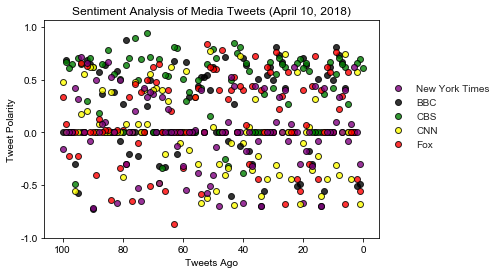

In [11]:
sns.set()
plt.title(f"Sentiment Analysis of Media Tweets ({most_recent_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.yticks(N, ('1.0', '0.5', '0.0', '-0.5', '-1.0'))
plt.gca().invert_xaxis()
plt.legend(handles = [nyt, bbc, cbs, cnn, fox],
           labels = ["New York Times", "BBC", "CBS", "CNN", "Fox"],
           bbox_to_anchor = (1,.75))

plt.savefig('Sentiment_Analysis_of_Media_Tweets.png', bbox_inches = 'tight')
plt.show()


In [12]:
#
# Create a DataFrame containing the average compound score of each media sources's tweeets
df2 = pd.DataFrame(df.groupby("media source").mean()['compound score'])
#df2.head()

In [13]:
#df.head()

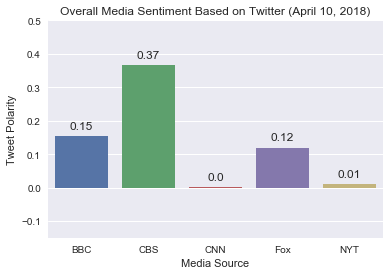

In [14]:
# Create a bar plot to display the information from df2
sns.set(style="darkgrid")
fig, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x=df2.index, y=df2["compound score"], data=df2, ci=None, saturation=.8)

plt.ylim(-.15, .50)

ax.set_title(f"Overall Media Sentiment Based on Twitter ({most_recent_tweet:%B %d, %Y})")

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords="offset points")

plt.ylabel('Tweet Polarity')
plt.xlabel('Media Source')
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
plt.savefig("Twitter_Media_Sentiment.png")
plt.show()


In [15]:
# Show cool alice word map

In [16]:
df.to_csv("Distingushing_Sentiments.csv", encoding='utf-8', index=False)